In [1]:
# Import necessary libraries
import os
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import mmread
from scipy.sparse import csr_matrix
import json

files=json.load(open("../data/folder_structure.json"))["AllonKleinLab"]["Experiment3"]
print(files)

# Setup all paths
out_path = "../out/AllonKleinLab/Experiment3"
if not os.path.exists(out_path):
    os.makedirs(out_path)

in_path = "../data/AllonKleinLab/Experiment3"
print(in_path)

# Setup testing phase
TEST = True
TEST_genes = 300
TEST_samples = 500

# Archetypes
k = 15

{'clone_matrix': 'stateFate_cytokinePerturbation_clone_matrix.mtx', 'gene_names': 'stateFate_cytokinePerturbation_gene_names.txt', 'metadata': 'stateFate_cytokinePerturbation_metadata.txt', 'normed_counts': 'stateFate_cytokinePerturbation_normed_counts.mtx'}
../data/AllonKleinLab/Experiment3


 # Load Dataset

In [2]:
# Number of transcripts for each gene in each cell
print(in_path + f"/{files['normed_counts']}")
se = csr_matrix(mmread( in_path + f"/{files['normed_counts']}"))
#se = mmread("../../data/AllonKleinLab/Experiment1/stateFate_inVitro_normed_counts.mtx").T
print(se.shape)
print(type(se))
if TEST:
    tgenes = min(TEST_genes, se.shape[1])
    tsamples = min(TEST_samples, se.shape[0])
    se.resize((tsamples, tgenes))
    print(se.shape)
    print(type(se))

# Convert the matrix to AnnData object
adata = sc.AnnData(se)
print(adata)

#sc.pp.normalize_total(adata, target_sum=1e6)
##sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

../data/AllonKleinLab/Experiment3/stateFate_cytokinePerturbation_normed_counts.mtx
(65075, 25289)
<class 'scipy.sparse._csr.csr_matrix'>
(500, 300)
<class 'scipy.sparse._csr.csr_matrix'>
AnnData object with n_obs × n_vars = 500 × 300


/home/matteo/.conda/envs/pyaa/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/matteo/.conda/envs/pyaa/lib/python3.12/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


 # Visualize data

Saving Image --- ../out/AllonKleinLab/Experiment3/PCA.png


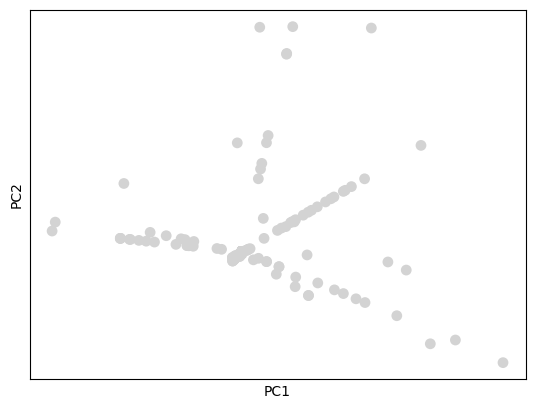

In [3]:
# PCA plot
imgname = os.path.join(out_path, "PCA.png")
print(f"Saving Image --- {imgname}")
sc.pl.pca(adata, save=imgname.split('/')[-1])

Saving Image --- ../out/AllonKleinLab/Experiment3/UMAP.png


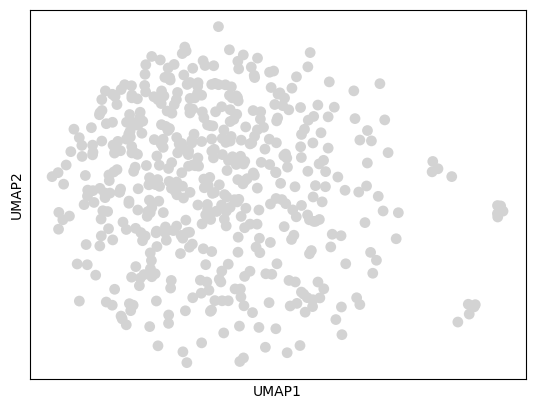

In [4]:
# UMAP plot
imgname = os.path.join(out_path, "UMAP.png")
print(f"Saving Image --- {imgname}")
sc.pl.umap(adata, save=imgname.split('/')[-1])

Saving Image --- ../out/AllonKleinLab/Experiment3/elbow.pdf


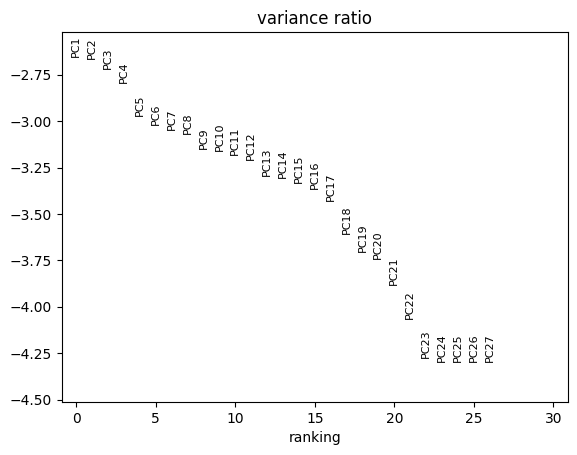

In [5]:
# Elbow plot
imgname = os.path.join(out_path, "elbow.pdf")
print(f"Saving Image --- {imgname}")
sc.pl.pca_variance_ratio(adata, log=True, save=imgname.split('/')[-1])

In [6]:
# Archetypes
import archetypes as arch
from time import time

aa_kwargs = {
    "n_archetypes": 4,
    "n_init": 5,
    "max_iter": 1000,
    "verbose": True,
    "tol": 1e-3,
}

mod0 = arch.AA(**aa_kwargs, algorithm_init="random")

t0=time()
mod0.fit_transform(adata.X)
t1=time()

print(f"mod0: {t1-t0:.2f} seconds|RSS: {mod0.rss:.2f}")

Initialization 1/5
    Iteration:    1, RSS: inf


RuntimeError: Maximum number of iterations reached.